In [7]:
import pandas as pd
import glob
import wfdb
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches': None}
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from IPython.display import display
from scipy.stats import norm
%matplotlib inline

In [65]:
df= pd.read_csv("../../../data/initial_dataset/ITD_merge.100419.csv",sep=",")
df.head()

,data_pd,sample_pd,IID,Read_count,Insertion_pt,Length,Inserted_sequence,Microhomology,NTS,Num_ITDs,Second_ITD,donor_id,NGS_ITD,Clin_ITD,Clin_Ratio,Merge_ITD,Merge_ITD_Ratio,Calledby
0,PD20306a,PD20306a,PD20306,39,13:28608270,30,AGGCTTCCATTTGAGATCATATTCATATTC,.,AGGCTT,1,.,15-0242,ITD,na,na,ITD,na,NGS_na
1,PD20304a,PD20304a,PD20304,200,13:28608308,48,ATTCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCTGAGGAGC,.,.,1,.,15-0602,ITD,na,na,ITD,na,NGS_na
2,PD20300a,PD20300a,PD20300,182,13:28608322,60,TCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCTGAGGAGC...,.,.,2,6___13:28608322___66___TCATATTCATATTCTCTGAAATC...,15-0736,ITD,na,na,ITD,na,NGS_na
3,PD15032c,PD14985a,PD14985,104,13:28608288,75,ACTACCAAACTCTAAATTTTCTCTTGGAAACTCCCATTTGAGATCA...,.,AC,4,32___13:28608273___24___TTTGAGATCATATTCATATTCT...,16-1187,ITD,na,na,ITD,na,NGS_na
4,PD15035a2,PD15035a,PD15035,185,13:28608286,30,TCATATTCATATTCTCTGAAATCAACGTAG,.,.,5,12___13:28608322___48___GAATCAACGTAGAAGTACTCAT...,17-2818,ITD,na,na,ITD,na,NGS_na


In [9]:
## Check for column data_pd and sample_pd are not the same
a=df.loc[~(df['data_pd'] == df['sample_pd'])]
#df.loc[~(df['IID'] == df['sample_pd'])]
a[a.index.isin([3,4,5,6,7])]


,data_pd,sample_pd,IID,Read_count,Insertion_pt,Length,Inserted_sequence,Microhomology,NTS,Num_ITDs,Second_ITD,donor_id,NGS_ITD,Clin_ITD,Clin_Ratio,Merge_ITD,Merge_ITD_Ratio,Calledby
3,PD15032c,PD14985a,PD14985,104,13:28608288,75,ACTACCAAACTCTAAATTTTCTCTTGGAAACTCCCATTTGAGATCA...,.,AC,4,32___13:28608273___24___TTTGAGATCATATTCATATTCT...,16-1187,ITD,na,na,ITD,na,NGS_na
4,PD15035a2,PD15035a,PD15035,185,13:28608286,30,TCATATTCATATTCTCTGAAATCAACGTAG,.,.,5,12___13:28608322___48___GAATCAACGTAGAAGTACTCAT...,17-2818,ITD,na,na,ITD,na,NGS_na
5,PD15038a,PD14979a,PD14979,61,13:28608319,69,GTGAGATCATATTCATATTCTCTGAAATCAACGTAGAAGTACTCAT...,.,G,2,12___13:28608319___57___TCATATTCTCTGAAATCAACGT...,17-2840,ITD,na,na,ITD,na,NGS_na
6,PD15028a2,PD15028a,PD15028,101,13:28608301,42,CTTTCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCT,.,CT,2,7___13:28608534___380___CATTTTAAAGATTTTCCAATGG...,17-2891,ITD,na,na,ITD,na,NGS_na
7,PD14998a,PD15019c,PD15019,163,13:28608313,75,GGAAACTCCCATTTGAGATCATATTCATATTCTCTGAAATCAACGT...,.,.,1,.,17-2999,ITD,na,na,ITD,na,NGS_na


In [10]:
# Check that one identifier per patient:
print (sum(df.sample_pd.value_counts()),sum(df.data_pd.value_counts()),sum(df.IID.value_counts()))

2446 2446 2446


In [11]:
df.columns

Index(['data_pd', 'sample_pd', 'IID', 'Read_count', 'Insertion_pt', 'Length',
       'Inserted_sequence', 'Microhomology', 'NTS', 'Num_ITDs', 'Second_ITD',
       'donor_id', 'NGS_ITD', 'Clin_ITD', 'Clin_Ratio', 'Merge_ITD',
       'Merge_ITD_Ratio', 'Calledby'],
      dtype='object')

## Study with na as -1 and without nas for all features that we might take into account

In [908]:
df_itd = df[['IID','NGS_ITD','Clin_ITD','Clin_Ratio','Merge_ITD','Read_count','Length']]
df_itd = df_itd.set_index('IID')
df_itd = df_itd.replace(['ITD', 'No_ITD'], [1, 0])
df_itd = df_itd.apply(pd.to_numeric, errors='coerce')

df_itd_replace_na = df_itd
df_itd_replace_na=df_itd_replace_na.fillna(-1)
df_itd_no_na = df_itd
df_itd_no_na=df_itd_no_na.dropna()
print('Shape of datframe replacing na:' ,df_itd_replace_na.shape)
print('Shape of datframe without na:' ,df_itd_no_na.shape)

#df_itd = df_itd.replace(['ITD', 'No_ITD', 'na','.'], [1, 0, -1,-1])
#df_itd=df_itd.apply(pd.to_numeric)

Shape of datframe replacing na: (2446, 6)
Shape of datframe without na: (560, 6)


In [909]:
df_itd.head()

,NGS_ITD,Clin_ITD,Clin_Ratio,Merge_ITD,Read_count,Length
IID,,,,,,
PD20306,1.0,NaN,NaN,1.0,39.0,30.0
PD20304,1.0,NaN,NaN,1.0,200.0,48.0
PD20300,1.0,NaN,NaN,1.0,182.0,60.0
PD14985,1.0,NaN,NaN,1.0,104.0,75.0
PD15035,1.0,NaN,NaN,1.0,185.0,30.0


In [910]:
df_itd_replace_na.head()

,NGS_ITD,Clin_ITD,Clin_Ratio,Merge_ITD,Read_count,Length
IID,,,,,,
PD20306,1.0,-1.0,-1.0,1.0,39.0,30.0
PD20304,1.0,-1.0,-1.0,1.0,200.0,48.0
PD20300,1.0,-1.0,-1.0,1.0,182.0,60.0
PD14985,1.0,-1.0,-1.0,1.0,104.0,75.0
PD15035,1.0,-1.0,-1.0,1.0,185.0,30.0


### Check the unique values for those columns

label -1 replace,without: 26 , 0
label 0 replace,without: 1814 , 0
label 1 replace,without: 606 , 560


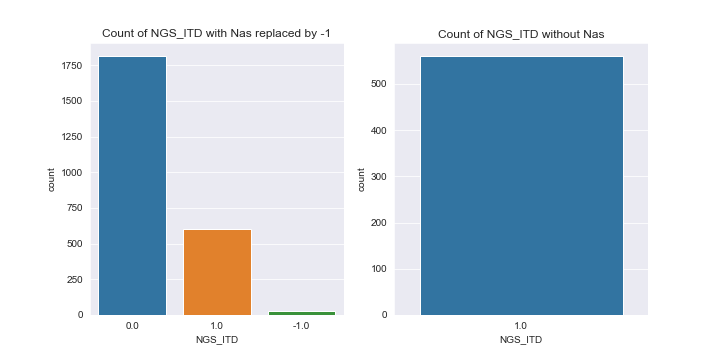

In [911]:
f, axes = plt.subplots(1, 2,figsize=(10,5))
axes[0].set_title('Count of NGS_ITD with Nas replaced by -1')
sns.countplot(x="NGS_ITD", data=df_itd_replace_na,order= df_itd_replace_na.NGS_ITD.value_counts().index,ax=axes[0])
axes[1].set_title('Count of NGS_ITD without Nas')
sns.countplot(x="NGS_ITD", data=df_itd_no_na,order= df_itd_no_na.NGS_ITD.value_counts().index,ax=axes[1])
print('label -1 replace,without:',len(df_itd_replace_na[df_itd_replace_na.NGS_ITD==-1]),',',len(df_itd_no_na[df_itd_no_na.NGS_ITD==-1]))
print('label 0 replace,without:',len(df_itd_replace_na[df_itd_replace_na.NGS_ITD==0]),',',len(df_itd_no_na[df_itd_no_na.NGS_ITD==0]))
print('label 1 replace,without:',len(df_itd_replace_na[df_itd_replace_na.NGS_ITD==1]),',',len(df_itd_no_na[df_itd_no_na.NGS_ITD==1]))

label -1 replace,without: 293 , 0
label 0 replace,without: 1724 , 169
label 1 replace,without: 429 , 391


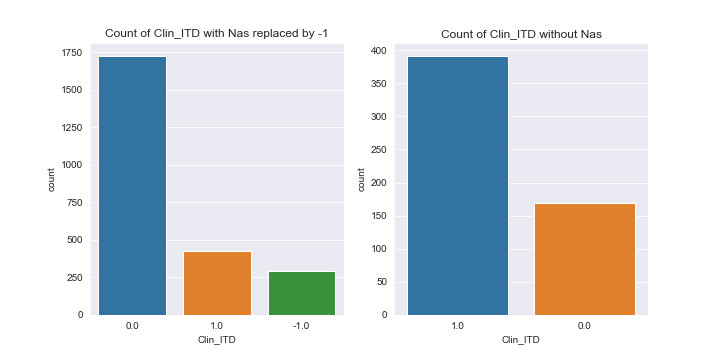

In [912]:
f, axes = plt.subplots(1, 2,figsize=(10,5))
axes[0].set_title('Count of Clin_ITD with Nas replaced by -1')
sns.countplot(x="Clin_ITD", data=df_itd_replace_na,order= df_itd_replace_na.Clin_ITD.value_counts().index,ax=axes[0])
axes[1].set_title('Count of Clin_ITD without Nas')
sns.countplot(x="Clin_ITD", data=df_itd_no_na,order= df_itd_no_na.Clin_ITD.value_counts().index,ax=axes[1])
print('label -1 replace,without:',len(df_itd_replace_na[df_itd_replace_na.Clin_ITD==-1]),',',len(df_itd_no_na[df_itd_no_na.Clin_ITD==-1]))
print('label 0 replace,without:',len(df_itd_replace_na[df_itd_replace_na.Clin_ITD==0]),',',len(df_itd_no_na[df_itd_no_na.Clin_ITD==0]))
print('label 1 replace,without:',len(df_itd_replace_na[df_itd_replace_na.Clin_ITD==1]),',',len(df_itd_no_na[df_itd_no_na.Clin_ITD==1]))

label -1 replace,without: 1 , 0
label 0 replace,without: 1801 , 0
label 1 replace,without: 644 , 560


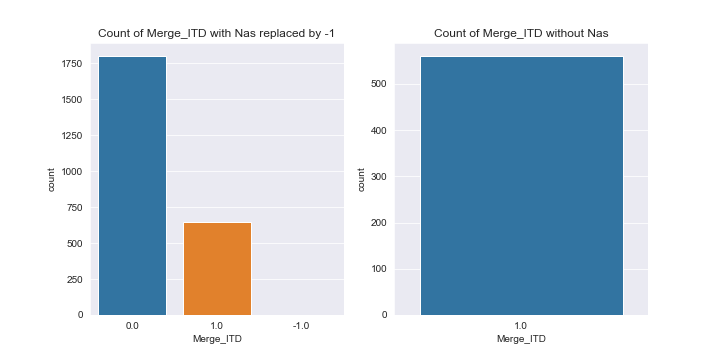

In [913]:
f, axes = plt.subplots(1, 2,figsize=(10,5))
axes[0].set_title('Count of Merge_ITD with Nas replaced by -1')
sns.countplot(x="Merge_ITD", data=df_itd_replace_na,order= df_itd_replace_na.Merge_ITD.value_counts().index,ax=axes[0])
axes[1].set_title('Count of Merge_ITD without Nas')
sns.countplot(x="Merge_ITD", data=df_itd_no_na,order= df_itd_no_na.Merge_ITD.value_counts().index,ax=axes[1])
print('label -1 replace,without:',len(df_itd_replace_na[df_itd_replace_na.Merge_ITD==-1]),',',len(df_itd_no_na[df_itd_no_na.Merge_ITD==-1]))
print('label 0 replace,without:',len(df_itd_replace_na[df_itd_replace_na.Merge_ITD==0]),',',len(df_itd_no_na[df_itd_no_na.Merge_ITD==0]))
print('label 1 replace,without:',len(df_itd_replace_na[df_itd_replace_na.Merge_ITD==1]),',',len(df_itd_no_na[df_itd_no_na.Merge_ITD==1]))

In [914]:
df_itd.Clin_Ratio.unique()
sum((df_itd.Clin_Ratio == -1)==True)

0

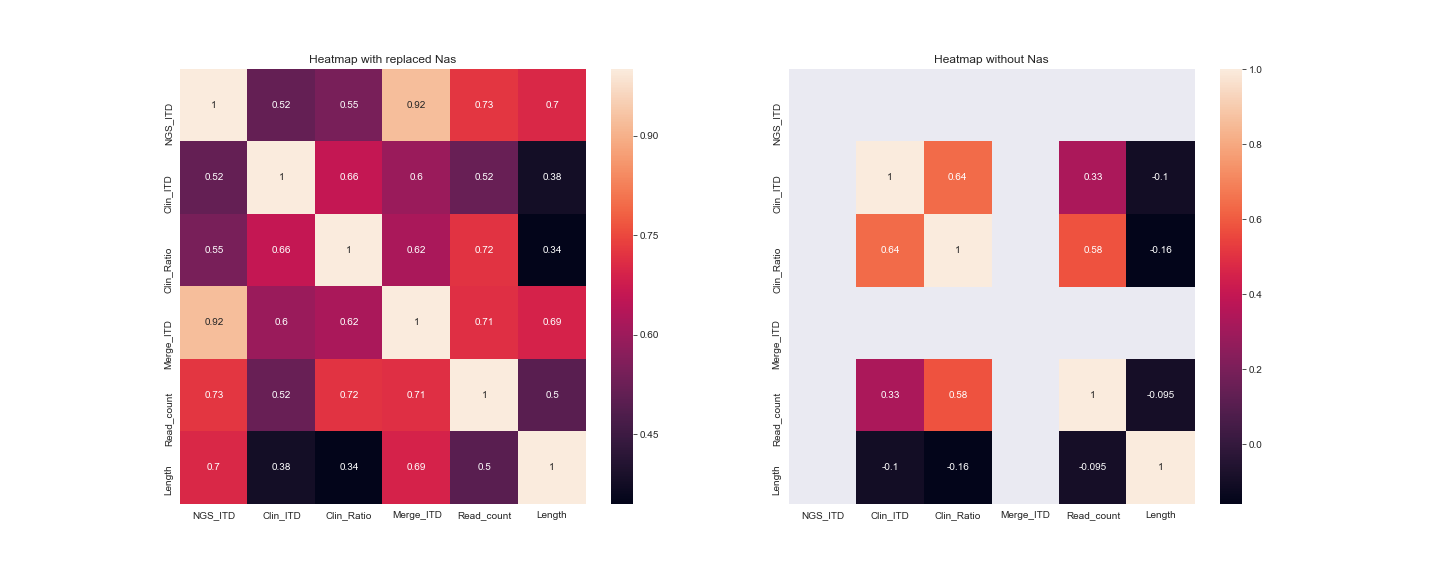

In [915]:
f, axes = plt.subplots(1, 2,figsize=(20,8))
axes[0].set_title('Heatmap with replaced Nas')
sns.heatmap(df_itd_replace_na.corr(), annot=True, ax=axes[0])
axes[1].set_title('Heatmap without Nas')
sns.heatmap(df_itd_no_na.corr(), annot=True, ax=axes[1])
plt.title('Heatmap without Nas')
plt.show()

### Same heatmap without Length and Read count because they have to many missing values

(2446, 4)
Shape of datframe replacing na: (2446, 4)
Shape of datframe without na: (2128, 4)


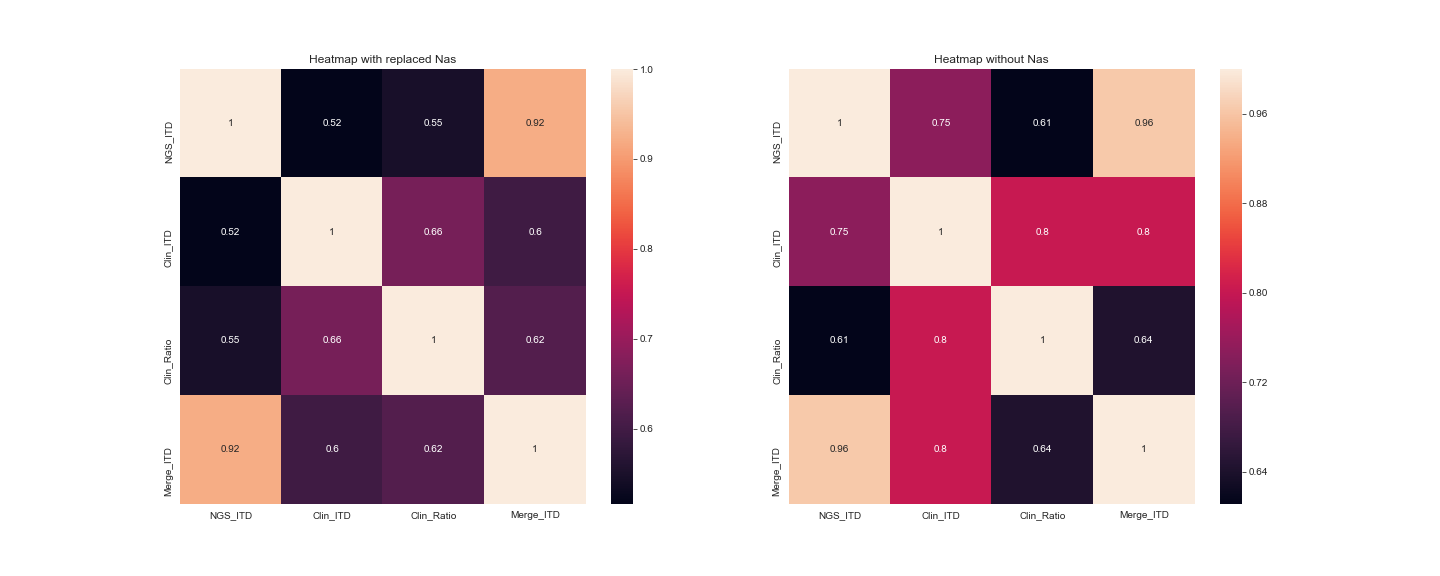

In [916]:
df_itd1 = df[['IID','NGS_ITD','Clin_ITD','Clin_Ratio','Merge_ITD']]
df_itd1 = df_itd1.set_index('IID')
df_itd1 = df_itd1.replace(['ITD', 'No_ITD'], [1, 0])
df_itd1 = df_itd1.apply(pd.to_numeric, errors='coerce')
df_itd_few_var_replace_na = df_itd1
df_itd_few_var_replace_na=df_itd_few_var_replace_na.fillna(-1)
df_itd_few_var_no_na = df_itd1
df_itd_few_var_no_na=df_itd_few_var_no_na.dropna()
print (df_itd1.shape)
print('Shape of datframe replacing na:' ,df_itd_few_var_replace_na.shape)
print('Shape of datframe without na:' ,df_itd_few_var_no_na.shape)
f, axes = plt.subplots(1, 2,figsize=(20,8))
axes[0].set_title('Heatmap with replaced Nas')
sns.heatmap(df_itd_few_var_replace_na.corr(), annot=True, ax=axes[0])
axes[1].set_title('Heatmap without Nas')
sns.heatmap(df_itd_few_var_no_na.corr(), annot=True, ax=axes[1])
plt.title('Heatmap without Nas')
plt.show()

### Strong correlation between Merge_ITD and NGS_ITD (not the right metric to use though it is just to have a summary of the variables)

##### Let's look at the cases when NGS_ITD and Merge_ITD differs

### Let's look at cases by cases

### I- When Clinical is 1 and NGS is 1 :

In [917]:
df_itd_c1 = df_itd[(df_itd.NGS_ITD ==1) & (df_itd.Clin_ITD==1)]
df_itd_c1[df_itd_c1.Clin_Ratio.isna()].shape


(0, 6)

##### It means that when we have both NGS and Clin ITD , we have the clinical ratio.
Now, let's look at the read counts considered as an important metric

In [918]:
df_itd_c1[df_itd_c1.Read_count.isna()].shape

(0, 6)

##### It means that when we have both NGS and Clin ITD , we have the read counts.

##### Let's look at the plots of the clinical Ratio and the read counts to see if we can derive something

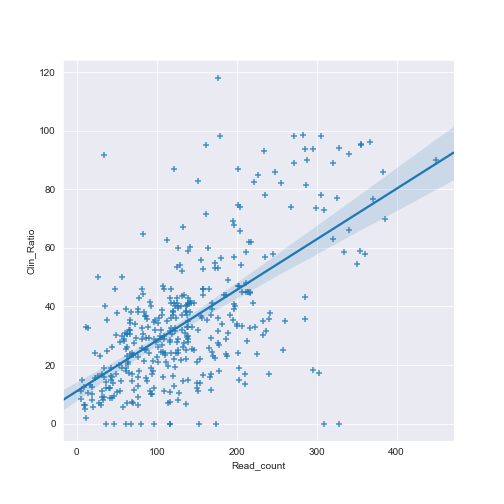

In [919]:
plt.figure(figsize=(7,7))
sns.regplot(df_itd_c1.Read_count,df_itd_c1.Clin_Ratio,marker='+')

##### Let's look at the description for Read count and Clin Ratio (mean and std)

In [920]:
df_itd_c1.describe()

,NGS_ITD,Clin_ITD,Clin_Ratio,Merge_ITD,Read_count,Length
count,391.0,391.0,391.000000,391.0,391.000000,391.000000
mean,1.0,1.0,34.710486,1.0,136.808184,57.002558
std,0.0,0.0,22.886323,0.0,83.040840,39.860944
min,1.0,1.0,0.000000,1.0,5.000000,12.000000
25%,1.0,1.0,18.050000,1.0,76.000000,30.000000
50%,1.0,1.0,30.900000,1.0,124.000000,51.000000
75%,1.0,1.0,43.050000,1.0,179.500000,69.000000
max,1.0,1.0,118.000000,1.0,449.000000,346.000000


### II- When Clinical is 1 and NGS is 0 :

In [921]:
df_itd_c2 = df_itd[(df_itd.NGS_ITD ==0) & (df_itd.Clin_ITD==1)]
df_itd_c2[df_itd_c2.Clin_Ratio.isna()].shape

(0, 6)

##### Here, again all clinical ratio are available when the clinical ITD is 1.

### Distributions plots

#### When NGS is na:   (Read count are all empty)

Shape(rows,columns): (7, 6)
Mean/std: 42.114285714285714 / 28.87417696209011


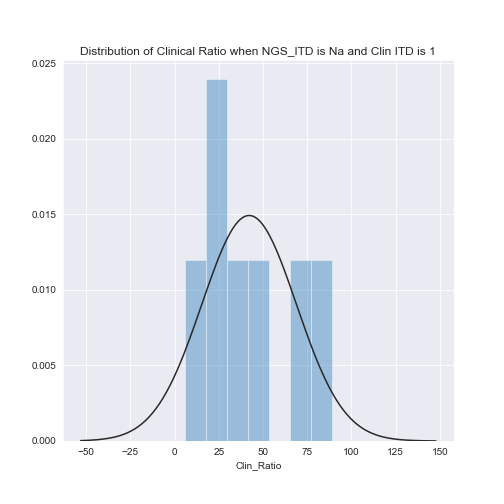

In [922]:
df_itd_c3=df_itd[df_itd.NGS_ITD.isna() & (df_itd.Clin_ITD==1)]
print('Shape(rows,columns):',df_itd_c3.shape)
print ('Mean/std:',df_itd_c3.Clin_Ratio.mean(),'/',df_itd_c3.Clin_Ratio.std())
plt.figure(figsize=(7,7))
plt.title('Distribution of Clinical Ratio when NGS_ITD is Na and Clin ITD is 1')
sns.distplot(df_itd_c3.Clin_Ratio,fit=norm,kde=False,bins=7)
plt.show()

#### When NGS is 0: (Read count are all empty)

Shape(rows,columns): (31, 6)
Mean/std: 29.038709677419355 / 22.867468558622093


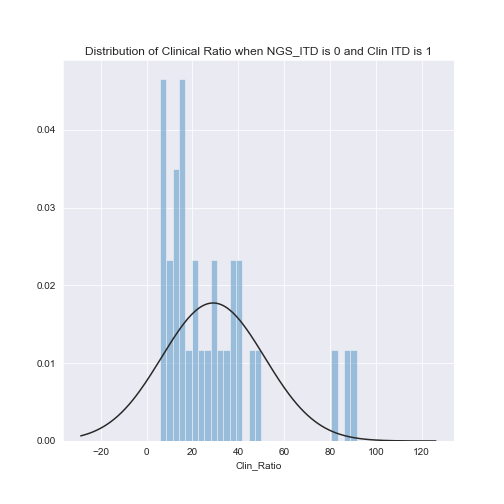

In [923]:
from scipy.stats import norm
df_itd_c3=df_itd[(df_itd.NGS_ITD==0) & (df_itd.Clin_ITD==1)]
print('Shape(rows,columns):',df_itd_c3.shape)
print ('Mean/std:',df_itd_c3.Clin_Ratio.mean(),'/',df_itd_c3.Clin_Ratio.std())
plt.figure(figsize=(7,7))
plt.title('Distribution of Clinical Ratio when NGS_ITD is 0 and Clin ITD is 1')
sns.distplot(df_itd_c3.Clin_Ratio,fit=norm,kde=False,bins=31)
plt.show()

#### When NGS is 1

Shape(rows,columns): (391, 6)
Mean/std for clinical ratio: 34.71048593350385 / 22.886322867132836
Mean/std for read count: 136.80818414322252 / 83.04083971789537


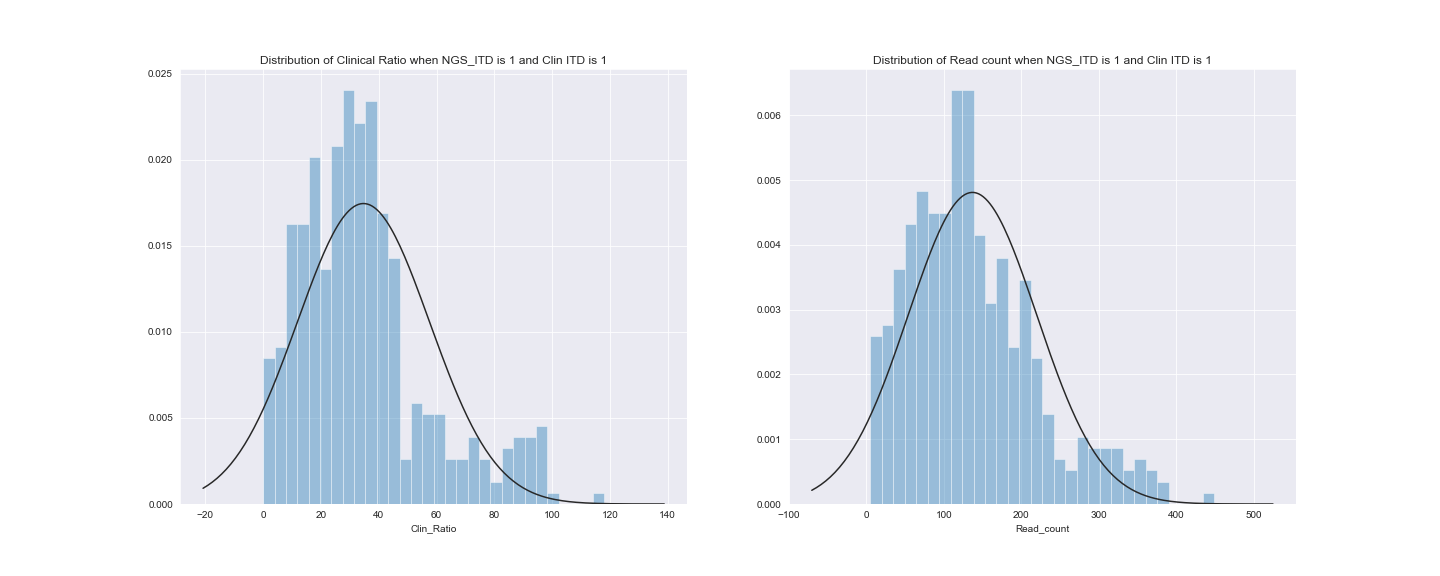

In [924]:
df_itd_c3=df_itd[(df_itd.NGS_ITD==1) & (df_itd.Clin_ITD==1)]
print('Shape(rows,columns):',df_itd_c3.shape)
print ('Mean/std for clinical ratio:',df_itd_c3.Clin_Ratio.mean(),'/',df_itd_c3.Clin_Ratio.std())
print ('Mean/std for read count:',df_itd_c3.Read_count.mean(),'/',df_itd_c3.Read_count.std())
f, axes = plt.subplots(1, 2,figsize=(20,8))
axes[0].set_title('Distribution of Clinical Ratio when NGS_ITD is 1 and Clin ITD is 1')
sns.distplot(df_itd_c3.Clin_Ratio,fit=norm,kde=False,bins=30,ax=axes[0])
axes[1].set_title('Distribution of Read count when NGS_ITD is 1 and Clin ITD is 1')
sns.distplot(df_itd_c3.Read_count,fit=norm,kde=False,bins=30,ax=axes[1])
plt.show()

In [925]:
#when clin itd is 1:
#-ngs_itd is na?
#-ngs_itd is 0: not reliable

Shape(rows,columns): (169, 6)
Mean/std for read count: 70.89349112426035 / 91.86111679492542


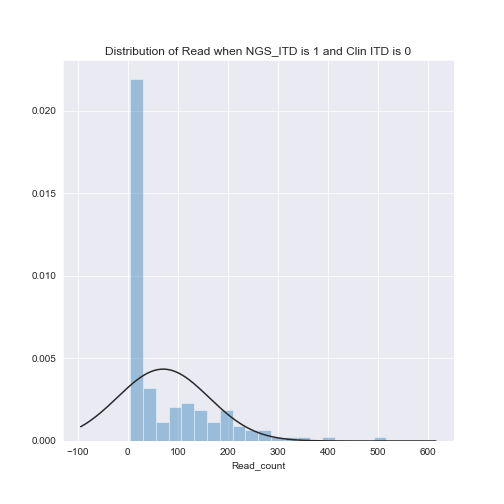

In [926]:
df_itd_c3=df_itd[(df_itd.NGS_ITD==1) & (df_itd.Clin_ITD==0)]
print('Shape(rows,columns):',df_itd_c3.shape)
print ('Mean/std for read count:',df_itd_c3.Read_count.mean(),'/',df_itd_c3.Read_count.std())
plt.figure(figsize=(7,7))
plt.title('Distribution of Read when NGS_ITD is 1 and Clin ITD is 0')
sns.distplot(df_itd_c3.Read_count,fit=norm,kde=False,bins=20)
plt.show()

### Let's look at when clinical ITD are Nas

Shape(rows,columns): (46, 6)
Mean/std for read count: 85.47826086956522 / 68.3704741765803


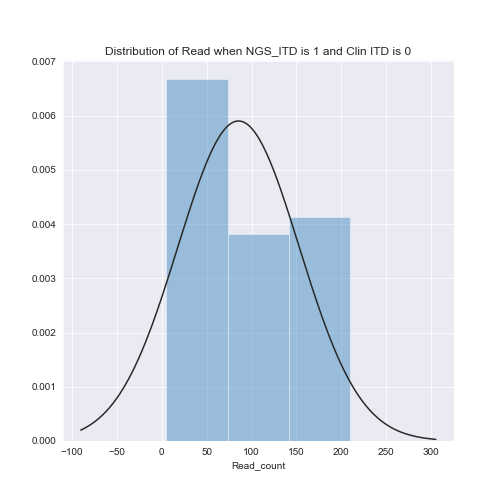

In [927]:
df_itd_c3=df_itd[(df_itd.NGS_ITD==1) & (df_itd.Clin_ITD.isna())]
print('Shape(rows,columns):',df_itd_c3.shape)
print ('Mean/std for read count:',df_itd_c3.Read_count.mean(),'/',df_itd_c3.Read_count.std())
plt.figure(figsize=(7,7))
plt.title('Distribution of Read when NGS_ITD is 1 and Clin ITD is 0')
sns.distplot(df_itd_c3.Read_count,fit=norm,kde=False)
plt.show()

### IV) Uncertain cases

##### Clin =0 and NGS =1

In [928]:
df_itd_c3=df_itd[(df_itd.Clin_ITD==0) & (df_itd.NGS_ITD==1)]


##### We can look at read counts since NGS_ITD is 1

Shape Clin ITD=0 (rows,columns): (169, 6)
Mean/std Clin ITD=0 for read count: 70.89349112426035 / 91.86111679492542
Shape Clin ITD=1 (rows,columns): (391, 6)
Mean/std Clin ITD=1 for read count: 136.80818414322252 / 83.04083971789537
Shape Clin ITD=Na (rows,columns): (46, 6)
Mean/std ITD=Na for read count: 85.47826086956522 / 68.3704741765803


/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/

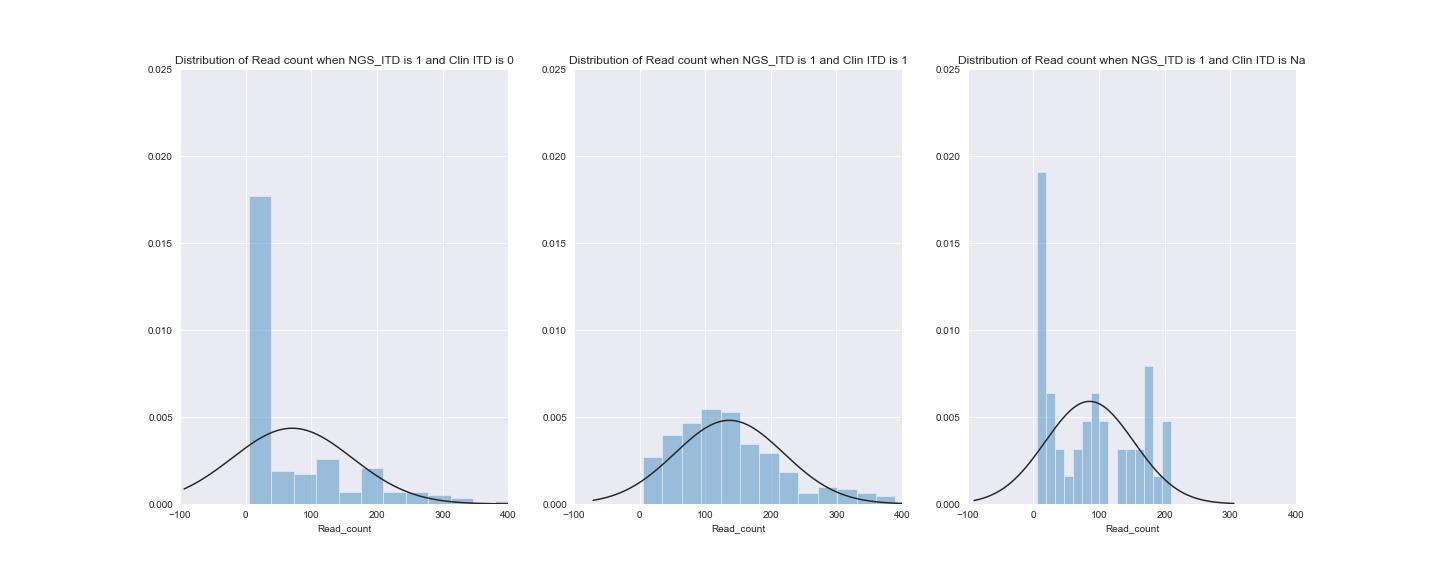

In [929]:
###let's look at the repartition of read counts within Clin ITD

df_itd_c3=df_itd[(df_itd.NGS_ITD==1)]
print('Shape Clin ITD=0 (rows,columns):',df_itd_c3[df_itd.Clin_ITD==0].shape)
print ('Mean/std Clin ITD=0 for read count:',df_itd_c3[df_itd.Clin_ITD==0].Read_count.mean(),'/',df_itd_c3[df_itd.Clin_ITD==0].Read_count.std())
print('Shape Clin ITD=1 (rows,columns):',df_itd_c3[df_itd.Clin_ITD==1].shape)
print ('Mean/std Clin ITD=1 for read count:',df_itd_c3[df_itd.Clin_ITD==1].Read_count.mean(),'/',df_itd_c3[df_itd.Clin_ITD==1].Read_count.std())
print('Shape Clin ITD=Na (rows,columns):',df_itd_c3[df_itd.Clin_ITD.isna()].shape)
print ('Mean/std ITD=Na for read count:',df_itd_c3[df_itd.Clin_ITD.isna()].Read_count.mean(),'/',df_itd_c3[df_itd.Clin_ITD.isna()].Read_count.std())
f, axes = plt.subplots(1, 3,figsize=(20,8))
axes[0].set_title('Distribution of Read count when NGS_ITD is 1 and Clin ITD is 0')
axes[0].set(ylim=(0, 0.025))
axes[0].set(xlim=(-100, 400))
sns.distplot(df_itd_c3[df_itd.Clin_ITD==0].Read_count,fit=norm,kde=False,ax=axes[0],bins=15)
axes[1].set_title('Distribution of Read count when NGS_ITD is 1 and Clin ITD is 1')
axes[1].set(ylim=(0, 0.025))
axes[1].set(xlim=(-100, 400))
sns.distplot(df_itd_c3[df_itd.Clin_ITD==1].Read_count,fit=norm,kde=False,ax=axes[1],bins=15)
axes[2].set_title('Distribution of Read count when NGS_ITD is 1 and Clin ITD is Na')
axes[2].set(ylim=(0, 0.025))
axes[2].set(xlim=(-100, 400))
sns.distplot(df_itd_c3[df_itd.Clin_ITD.isna()].Read_count,fit=norm,kde=False,ax=axes[2],bins=15)
plt.show()

/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/taziy/anaconda3/lib/

Shape Clin ITD=0 (rows,columns): (169, 6)
Mean/std Clin ITD=0 for Length: 68.6923076923077 / 71.60772770215982
Shape Clin ITD=1 (rows,columns): (391, 6)
Mean/std Clin ITD=1 for Length: 57.00255754475703 / 39.860944108702014
Shape Clin ITD=Na (rows,columns): (46, 6)
Mean/std ITD=Na for Length: 49.95652173913044 / 36.629045258124584


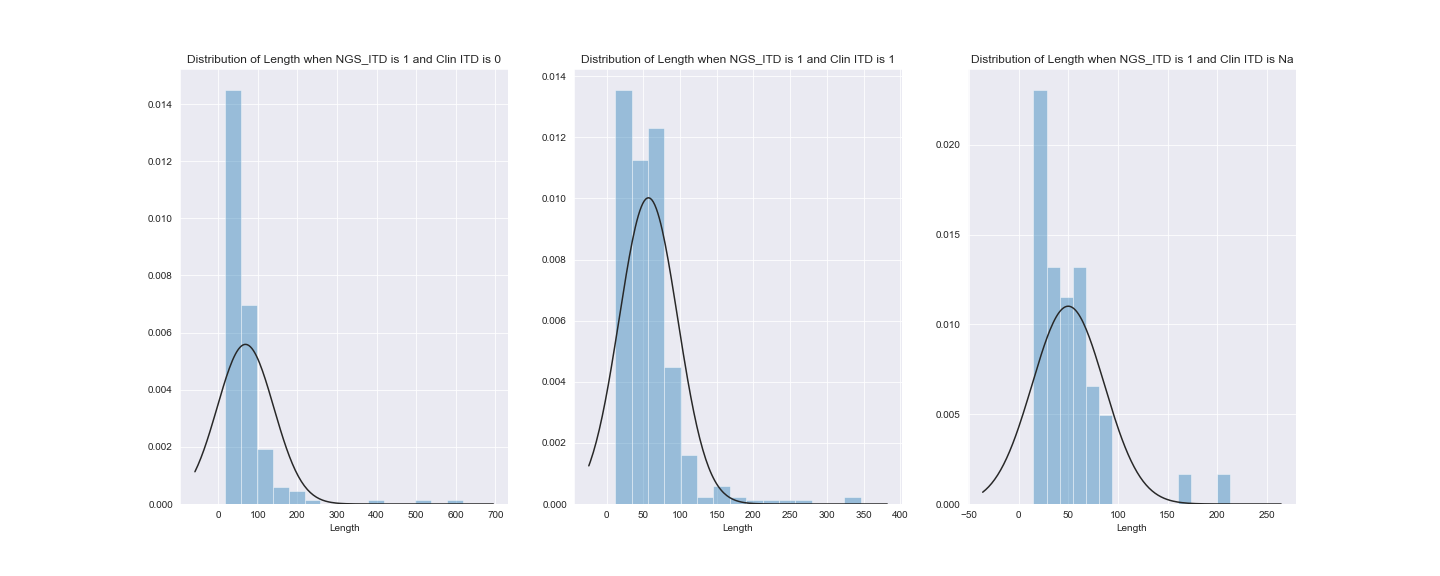

In [930]:
df_itd_c3=df_itd[(df_itd.NGS_ITD==1)]
print('Shape Clin ITD=0 (rows,columns):',df_itd_c3[df_itd.Clin_ITD==0].shape)
print ('Mean/std Clin ITD=0 for Length:',df_itd_c3[df_itd.Clin_ITD==0].Length.mean(),'/',df_itd_c3[df_itd.Clin_ITD==0].Length.std())
print('Shape Clin ITD=1 (rows,columns):',df_itd_c3[df_itd.Clin_ITD==1].shape)
print ('Mean/std Clin ITD=1 for Length:',df_itd_c3[df_itd.Clin_ITD==1].Length.mean(),'/',df_itd_c3[df_itd.Clin_ITD==1].Length.std())
print('Shape Clin ITD=Na (rows,columns):',df_itd_c3[df_itd.Clin_ITD.isna()].shape)
print ('Mean/std ITD=Na for Length:',df_itd_c3[df_itd.Clin_ITD.isna()].Length.mean(),'/',df_itd_c3[df_itd.Clin_ITD.isna()].Length.std())
f, axes = plt.subplots(1, 3,figsize=(20,8))
axes[0].set_title('Distribution of Length when NGS_ITD is 1 and Clin ITD is 0')
#axes[0].set(ylim=(0, 0.025))
#axes[0].set(xlim=(-100, 400))
sns.distplot(df_itd_c3[df_itd.Clin_ITD==0].Length,fit=norm,kde=False,ax=axes[0],bins=15)
axes[1].set_title('Distribution of Length when NGS_ITD is 1 and Clin ITD is 1')
#axes[1].set(ylim=(0, 0.025))
#axes[1].set(xlim=(-100, 400))
sns.distplot(df_itd_c3[df_itd.Clin_ITD==1].Length,fit=norm,kde=False,ax=axes[1],bins=15)
axes[2].set_title('Distribution of Length when NGS_ITD is 1 and Clin ITD is Na')
#axes[2].set(ylim=(0, 0.025))
#axes[2].set(xlim=(-100, 400))
sns.distplot(df_itd_c3[df_itd.Clin_ITD.isna()].Length,fit=norm,kde=False,ax=axes[2],bins=15)
plt.show()

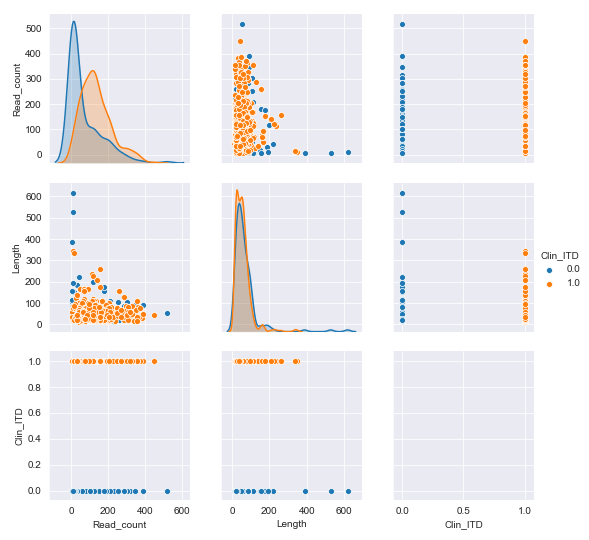

In [931]:
df_itd_c3=df_itd[(df_itd.NGS_ITD==1)]
g = sns.pairplot(df_itd_c3[['Read_count','Length','Clin_ITD']],hue="Clin_ITD")

In [932]:
#df_itd_c3=df_itd[(df_itd.NGS_ITD==1) & (~df_itd.Clin_ITD.isna())]
df_itd_c3=df_itd[(df_itd.NGS_ITD==1)]
df_itd_c3['Clin_ITD']=df_itd_c3['Clin_ITD'].fillna(-1)
df_itd_c3['Clin_ITD']=df_itd_c3['Clin_ITD'].astype(int)

/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


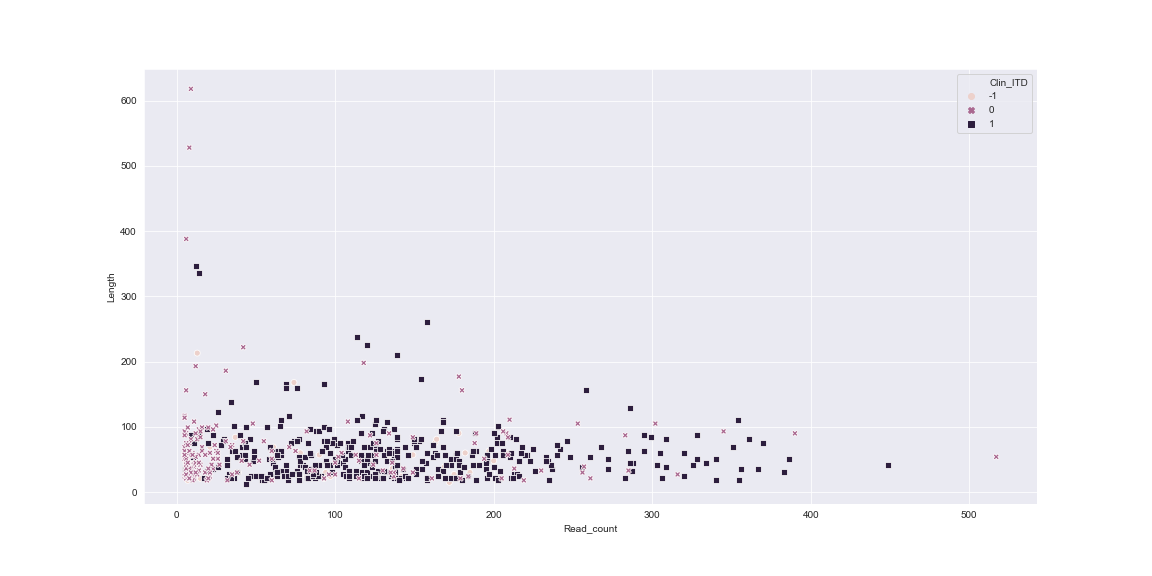

In [933]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x="Read_count", y="Length", hue="Clin_ITD",data=df_itd_c3,style='Clin_ITD')
plt.show()

In [934]:
##1 0 look at first the clinical ratio vs read count and length

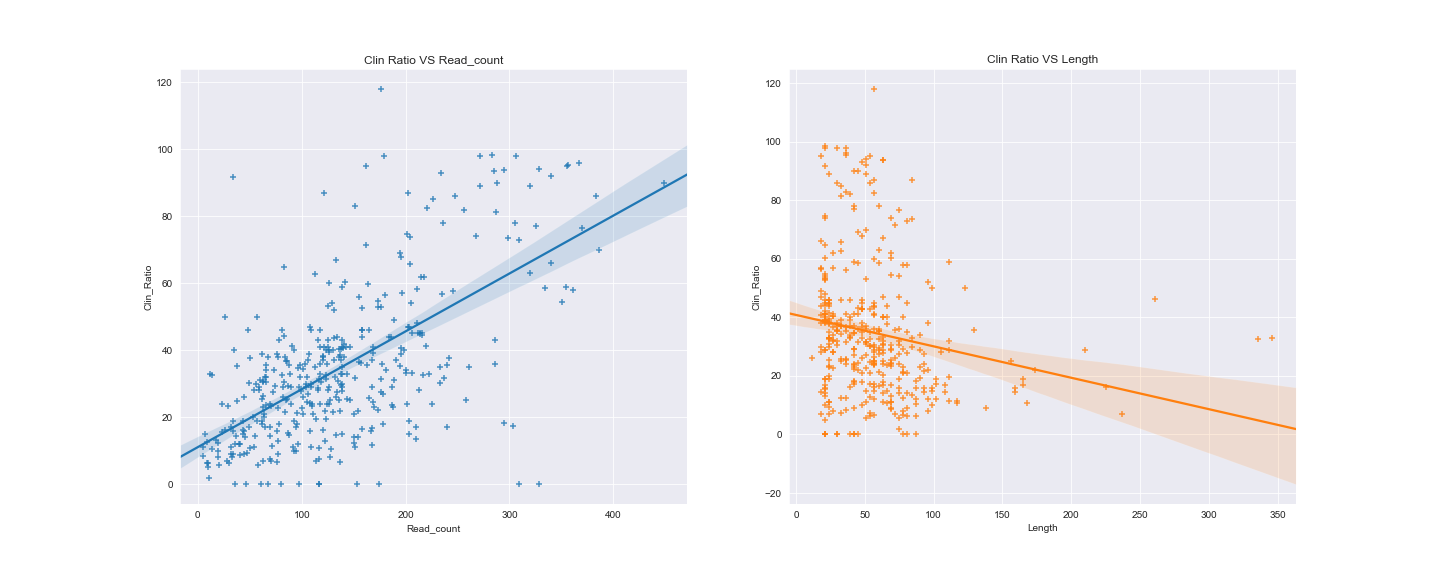

In [935]:
df_itd[(df_itd.NGS_ITD ==1) & (df_itd.Clin_ITD==1)]
f, axes = plt.subplots(1, 2,figsize=(20,8))
axes[0].set_title('Clin Ratio VS Read_count')
sns.regplot(df_itd_c1.Read_count,df_itd_c1.Clin_Ratio,marker='+',ax=axes[0])
axes[1].set_title('Clin Ratio VS Length')
sns.regplot(df_itd_c1.Length,df_itd_c1.Clin_Ratio,marker='+',ax=axes[1])

NGS_ITD // Clin_ITD // Conclusion
   1         1             1  

   1         0             ?

   1         na            ?

   0         1             1

   0         0             0

   0         na            0

   na        1             1

   na        0             0

   na        na            no answers.. 😞😞😞

### Rules for NGS_ITD is 1 and Clin_ITD is 0 (169 cases):


What we can deduce from distribution plots is that it is clear that when the number of reads are high we are more confident for ITD. 
Proof : we look at the distribution when both NGS and Clin are 1 which means we have a double check and therefore we are more confident because we have validated either the clinical with the NGS or the NGS with the Clinical.
Conclusion: we create a cutoff based on 0.7 (to be discussed) standard deviation on the left of the distribution for (NGS_ITD=1 & Clin_ITD=1) which is : 
(136.8 -0.7*83)=78.7

if NGS Read_count >79:
    1
else:
    0

### Rules for NGS_ITD is 1 and Clin_ITD is na (46 cases):

When we do not have the clinical results , we will rely on the NGS results combined with the read counts similarly to the case above.
The difference with the case above is that we do not have a contradiction between the two methods. So, the idea is to 'trust' more the NGS and relax the read counts cutoff in comparison with the previous case. 
However, we will still look at the number of reads which seems the main indicator correlated with the confidence for ITD.
Conclusion: set up a cutoff at 1 standard deviation on the left (instead of 0.7). This will means that we will conclude ITD more often based on the read counts compared to the case above. 
(136.8 -83)=53.8

if NGS Read_count > 53:
    1
else:
    0   
Please note that here we give more confidence to NGS because of the absence of clinical results and therefore the absence of conflicts so we can relax more on the left side of the distribution.

## Let's take a cutoff for both :
(169/215) * 0.7 + (46/215) * 1 =0.76 

### Data set with the new rules

In [61]:
df.shape

(2446, 18)

In [68]:
df= df.replace(['ITD', 'No_ITD'], [1, 0])
df[['NGS_ITD','Clin_ITD','Clin_Ratio','Merge_ITD','Read_count','Length']] = df[['NGS_ITD','Clin_ITD','Clin_Ratio','Merge_ITD','Read_count','Length']].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=['Clin_ITD','NGS_ITD'],how='all',inplace=True)
#df_new.reset_index(inplace=True)
mean = df[(df.NGS_ITD==1) & (df.Clin_ITD==1)].Read_count.mean()
std = df[(df.NGS_ITD==1) & (df.Clin_ITD==1)].Read_count.std()
def func(x):
    if ((x.NGS_ITD ==1) & (x.Clin_ITD ==0)):
        return 1 if (x.Read_count>mean-0.75*std) else 0
    elif ((x.NGS_ITD ==1) & ((x.Clin_ITD!=0) & (x.Clin_ITD!=1))):
        return 1 if (x.Read_count>mean-0.75*std) else 0
    else: return x.Merge_ITD
df_new=df
df_new['Merge_ITD_new_rules']=df_new.apply(func,1)

In [69]:
df_new.head()

,data_pd,sample_pd,IID,Read_count,Insertion_pt,Length,Inserted_sequence,Microhomology,NTS,Num_ITDs,Second_ITD,donor_id,NGS_ITD,Clin_ITD,Clin_Ratio,Merge_ITD,Merge_ITD_Ratio,Calledby,Merge_ITD_new_rules
0,PD20306a,PD20306a,PD20306,39.0,13:28608270,30.0,AGGCTTCCATTTGAGATCATATTCATATTC,.,AGGCTT,1,.,15-0242,1.0,NaN,NaN,1.0,na,NGS_na,0.0
1,PD20304a,PD20304a,PD20304,200.0,13:28608308,48.0,ATTCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCTGAGGAGC,.,.,1,.,15-0602,1.0,NaN,NaN,1.0,na,NGS_na,1.0
2,PD20300a,PD20300a,PD20300,182.0,13:28608322,60.0,TCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCTGAGGAGC...,.,.,2,6___13:28608322___66___TCATATTCATATTCTCTGAAATC...,15-0736,1.0,NaN,NaN,1.0,na,NGS_na,1.0
3,PD15032c,PD14985a,PD14985,104.0,13:28608288,75.0,ACTACCAAACTCTAAATTTTCTCTTGGAAACTCCCATTTGAGATCA...,.,AC,4,32___13:28608273___24___TTTGAGATCATATTCATATTCT...,16-1187,1.0,NaN,NaN,1.0,na,NGS_na,1.0
4,PD15035a2,PD15035a,PD15035,185.0,13:28608286,30.0,TCATATTCATATTCTCTGAAATCAACGTAG,.,.,5,12___13:28608322___48___GAATCAACGTAGAAGTACTCAT...,17-2818,1.0,NaN,NaN,1.0,na,NGS_na,1.0


#### Let's check when the new rules is changing for ITD
##### - 22 out of 46 cases for NGS_ITD is 1 and Clin_ITD is na   ~48%
##### - 113 out of 135 cases for NGS_ITD is 1 and Clin_ITD is 0    ~83%

In [75]:
df_diff=df_new[df_new.Merge_ITD != df_new.Merge_ITD_new_rules]
df_diff.shape

(135, 19)

### Let's Compare the merge ITD vs merge ITD new when they do not correspond

### Comments


##### With the new rules, we have changed the outcome of (135/2445) ~= 5.5 % of the whole dataset.
##### However, we need to take into account that those new rules apply only for 2 out of the 9 cases . 
##### -We changed 113 when Clin_ITD was 0 AND NGS_ITD was 1 with initial Merge_ITD =1 to Merge_ITD_new_rules =0
##### -We changed 22 when Clin_ITD was na AND NGS_ITD was 1 with initial Merge_ITD =1 to Merge_ITD_new_rules =0
##### When we look at the Read count average for the changes : it is very low and which explain that we can not trust the NGS_ITD results 
#### Finally, it is important to notice that the new rules only changes ITD from 1 to 0

In [41]:
### Write the csv file
df_new.to_csv("../../../data/updated_dataset/ITD_merge_updated.csv",sep=",")

In [83]:
df_new[(df_new.Clin_ITD==0)  & (df_new.NGS_ITD==1) & (df_new.Merge_ITD!=df_new.Merge_ITD_new_rules)  ][['Clin_ITD','NGS_ITD','Merge_ITD','Merge_ITD_new_rules','Read_count']].head()

,Clin_ITD,NGS_ITD,Merge_ITD,Merge_ITD_new_rules,Read_count
727,0.0,1.0,1.0,0.0,23.0
730,0.0,1.0,1.0,0.0,20.0
731,0.0,1.0,1.0,0.0,11.0
733,0.0,1.0,1.0,0.0,41.0
736,0.0,1.0,1.0,0.0,31.0
